In [1]:
import importlib
import ferbo as fb
importlib.reload(fb)
import numpy as np
%matplotlib widget

Transmon

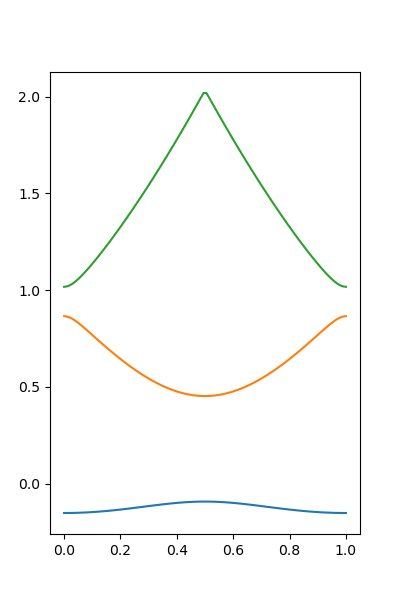

In [2]:
from qutip import charge, tunneling
import matplotlib.pyplot as plt
Nmax = 10
dimension = 2*Nmax + 1
eigvals = 3
Ec, Ej = 1, 2.5
ng_array = np.linspace(0,1, 100)
eigvals_array = np.zeros((len(ng_array),eigvals))
for i, ng in enumerate(ng_array):
    transmon = 4*Ec*(charge(Nmax,-Nmax)-ng)**2 - 0.5*Ej*tunneling(dimension)
    eigvals_array[i], eigvecs = transmon.eigenstates(eigvals= eigvals)

plt.close('all')
fig,ax = plt.subplots(figsize = (4,6))
ax.plot(ng_array,eigvals_array/np.sqrt(8*Ej*Ec))
plt.show()

In [3]:
charge(2,-2, frac=1/2)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[-1.   0.   0.   0.   0. ]
 [ 0.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5  0. ]
 [ 0.   0.   0.   0.   1. ]]

In [4]:
tunneling(5)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0.]]

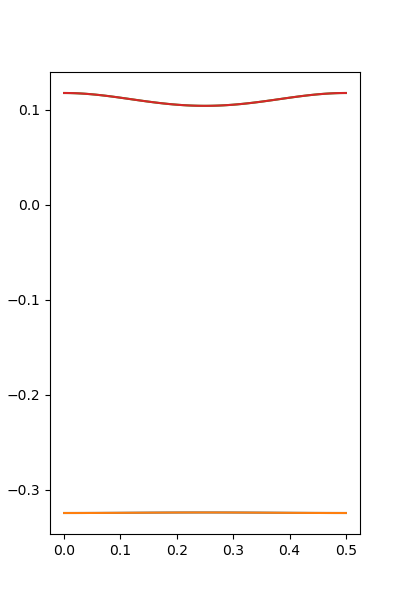

In [5]:
from qutip import charge, tunneling, tensor, sigmaz, qeye
import matplotlib.pyplot as plt
Nmax = 10
dimension = 2*Nmax + 1
eigvals = 4
Ec, Ej = 1, 2.5
ng_array = np.linspace(0,1/2, 100)
eigvals_array = np.zeros((len(ng_array),eigvals))
for i, ng in enumerate(ng_array):
    andreev = 4*Ec*tensor((charge(Nmax,-Nmax, frac=1/2)-ng)**2, qeye(2)) - 0.5*Ej*tensor(tunneling(dimension), sigmaz()) 
    eigvals_array[i], eigvecs = andreev.eigenstates(eigvals= eigvals)

plt.close('all')
fig,ax = plt.subplots(figsize = (4,6))
ax.plot(ng_array,eigvals_array/np.sqrt(8*Ej*Ec))
plt.show()

In [6]:
from qutip import Qobj
import scipy.sparse as sp
def tunneling_minus(N, m = 1):
    diags = [-np.ones(N-m,dtype=int),np.ones(N-m,dtype=int)]
    T = sp.diags(diags,[m,-m],format='csr', dtype=complex)
    return Qobj(T, isherm=True)/1j

In [16]:
Nmax = 3
charge(Nmax,-Nmax, frac=1/2)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[-1.5  0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.5]]

In [7]:
def cos_phi(N, phi_ext, m = 1):
    diags = [np.exp(1j*phi_ext/2)*np.ones(N-m,dtype=int),np.exp(-1j*phi_ext/2)*np.ones(N-m,dtype=int)]
    T = sp.diags(diags,[m,-m],format='csr', dtype=complex)
    return Qobj(T, isherm=True)/2

def sin_phi(N, phi_ext, m = 1):
    diags = [np.exp(1j*phi_ext/2)*np.ones(N-m,dtype=int),-np.exp(-1j*phi_ext/2)*np.ones(N-m,dtype=int)]
    T = sp.diags(diags,[m,-m],format='csr', dtype=complex)
    return Qobj(T, isherm=True) /2/1j 

sin_phi(4, np.pi, m = 1)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.  0.5 0.  0. ]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.  0.  0.5 0. ]]

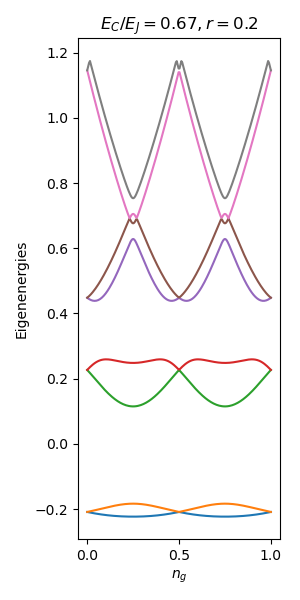

In [30]:
from qutip import charge, tensor, sigmaz, sigmay, qeye
import matplotlib.pyplot as plt
Nmax = 20
r = 0.2
phi_ext = 0
dimension = 2*Nmax + 1
eigvals = 8
Ec, Ej = 1,1.5
ng_array = np.linspace(0,1, 200)
eigvals_array = np.zeros((len(ng_array),eigvals))
for i, ng in enumerate(ng_array):
    andreev = 4*Ec*tensor((charge(Nmax,-Nmax, frac=1/2)-ng)**2, qeye(2)) + Ej*(tensor(cos_phi(dimension, phi_ext, m = 1), sigmaz()) + r * tensor(sin_phi(dimension, phi_ext, m = 1), sigmay()))
    eigvals_array[i], eigvecs = andreev.eigenstates(eigvals= eigvals)

plt.close('all')
fig,ax = plt.subplots(figsize = (3,6))
ax.plot(ng_array,eigvals_array/np.sqrt(8*Ej*Ec))
ax.set_title(rf'$E_C/E_J = {round(Ec/Ej, 2)}, r = {r}$')
ax.set_xlabel(rf'$n_g$')
ax.set_ylabel(rf'Eigenenergies')
fig.tight_layout()
plt.show()

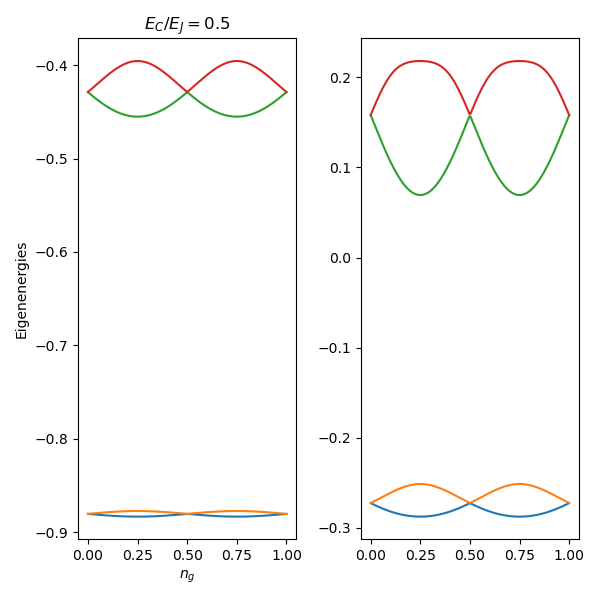

In [41]:
from qutip import charge, tensor, sigmaz, sigmay, qeye
import matplotlib.pyplot as plt
Nmax = 20
r = 0.2
phi_ext = 0
dimension = 2*Nmax + 1
eigvals = 4
ng_array = np.linspace(0,1, 200)
eigvals_array1 = np.zeros((len(ng_array),eigvals))
eigvals_array2 = np.zeros((len(ng_array),eigvals))

Ec1,Ej = 0.1,1
for i, ng in enumerate(ng_array):
    andreev = 4*Ec1*tensor((charge(Nmax,-Nmax, frac=1/2)-ng)**2, qeye(2)) + Ej*(tensor(cos_phi(dimension, phi_ext, m = 1), sigmaz()) + r * tensor(sin_phi(dimension, phi_ext, m = 1), sigmay()))
    eigvals_array1[i], eigvecs = andreev.eigenstates(eigvals= eigvals)

Ec2,Ej = 0.5,1
for i, ng in enumerate(ng_array):
    andreev = 4*Ec2*tensor((charge(Nmax,-Nmax, frac=1/2)-ng)**2, qeye(2)) + Ej*(tensor(cos_phi(dimension, phi_ext, m = 1), sigmaz()) + r * tensor(sin_phi(dimension, phi_ext, m = 1), sigmay()))
    eigvals_array2[i], eigvecs = andreev.eigenstates(eigvals= eigvals)

plt.close('all')
fig,ax = plt.subplots(1,2,figsize = (6,6))
ax[0].plot(ng_array,eigvals_array1/np.sqrt(8*Ej*Ec1))
ax[1].plot(ng_array,eigvals_array2/np.sqrt(8*Ej*Ec2))
ax[0].set_title(rf'$E_C/E_J = {round(Ec1/Ej, 2)}$')
ax[1].set_title(rf'$E_C/E_J = {round(Ec2/Ej, 2)}$')
ax[0].set_xlabel(rf'$n_g$')
ax[0].set_ylabel(rf'Eigenenergies')
fig.tight_layout()
plt.show()

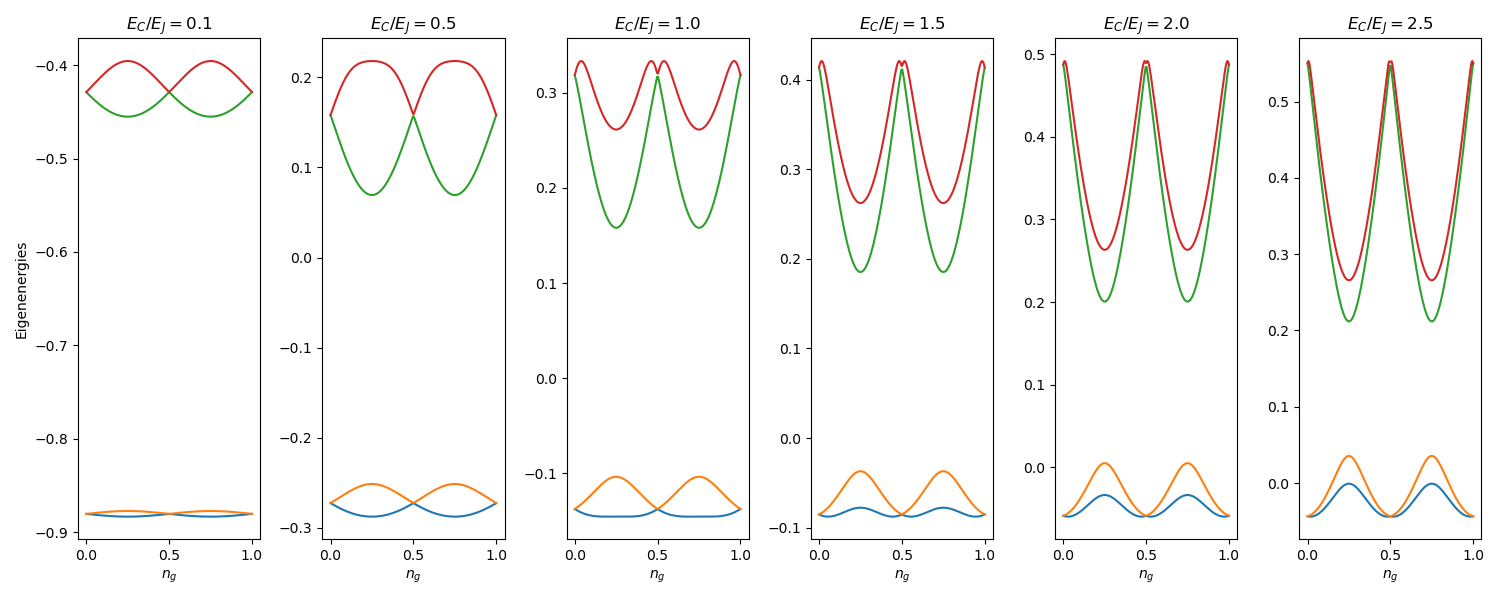

In [44]:
from qutip import charge, tensor, sigmaz, sigmay, qeye
import matplotlib.pyplot as plt
import numpy as np

# Definir los valores de Ec que deseas considerar
Ec_values = [0.1, 0.5, 1, 1.5, 2, 2.5]

Nmax = 20
r = 0.2
phi_ext = 0
dimension = 2 * Nmax + 1
eigvals = 4
ng_array = np.linspace(0, 1, 200)

# Crear una lista para almacenar los arrays de eigvals correspondientes a cada valor de Ec
eigvals_arrays = []

Ej = 1

# Iterar a través de los valores de Ec
for Ec in Ec_values:
    eigvals_array = np.zeros((len(ng_array), eigvals))
    
    for i, ng in enumerate(ng_array):
        andreev = 4 * Ec * tensor((charge(Nmax, -Nmax, frac=1/2) - ng)**2, qeye(2)) + Ej * (tensor(cos_phi(dimension, phi_ext, m=1), sigmaz()) + r * tensor(sin_phi(dimension, phi_ext, m=1), sigmay()))
        eigvals_array[i], eigvecs = andreev.eigenstates(eigvals=eigvals)
    
    # Agregar el array de eigvals a la lista
    eigvals_arrays.append(eigvals_array)

# Crear subplots para cada valor de Ec
plt.close('all')
fig, ax = plt.subplots(1, len(Ec_values), figsize=(2.5 * len(Ec_values), 6))
ax[0].set_ylabel(rf'Eigenenergies')
for i, Ec in enumerate(Ec_values):
    ax[i].plot(ng_array, eigvals_arrays[i] / np.sqrt(8 * Ej * Ec))
    ax[i].set_title(rf'$E_C/E_J = {round(Ec/Ej, 2)}$')
    ax[i].set_xlabel(rf'$n_g$')

fig.tight_layout()
plt.show()


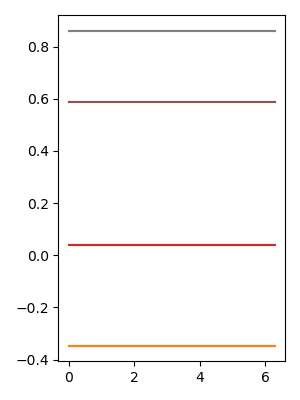

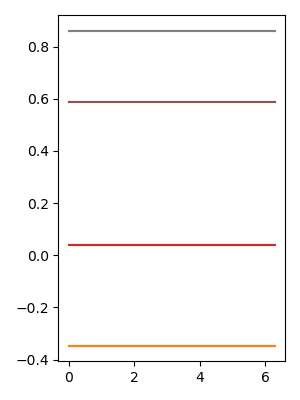

In [9]:
from qutip import charge, tensor, sigmaz, sigmay, qeye, sigmax
import matplotlib.pyplot as plt
Nmax = 10
r = 0.8
ng = 0
dimension = 2*Nmax + 1
eigvals = 8
Ec, Ej = 1,2
phi_array = np.linspace(0,2*np.pi, 100)
eigvals_array = np.zeros((len(phi_array),eigvals))
for i, phi_ext in enumerate(phi_array):
    andreev = 4*Ec*tensor((charge(Nmax,-Nmax, frac=1/2)-ng)**2, qeye(2)) + Ej*(tensor(cos_phi(dimension, phi_ext, m = 1), sigmaz()) + r * tensor(sin_phi(dimension, phi_ext, m = 1), sigmay()))
    eigvals_array[i], eigvecs = andreev.eigenstates(eigvals= eigvals)

plt.close('all')
fig,ax = plt.subplots(figsize = (3,4))
ax.plot(phi_array,eigvals_array/np.sqrt(8*Ej*Ec))
fig.tight_layout()
plt.show()

Tests

  0%|          | 0/100 [00:00<?, ?it/s]

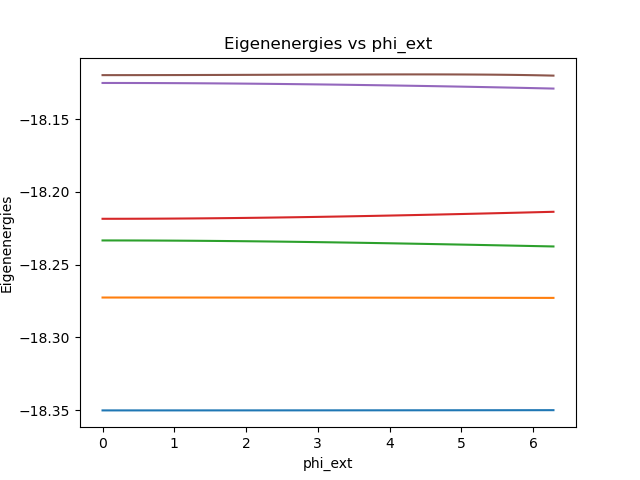

  0%|          | 0/100 [00:00<?, ?it/s]

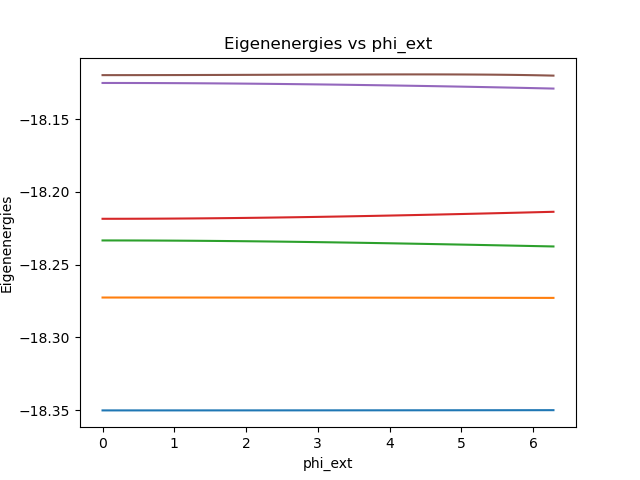

In [10]:
fixed_params = {
    'Ec': 40,
    'El': 0.00001,
    'Delta': 20,
    'r': 0.5,
    'dimension': 100
}

phi_ext_array = np.linspace(0, 2*np.pi, 100)

eigenenergies = fb.eigenenergies_vs_parameter('phi_ext', phi_ext_array, fixed_params)

  0%|          | 0/100 [00:00<?, ?it/s]

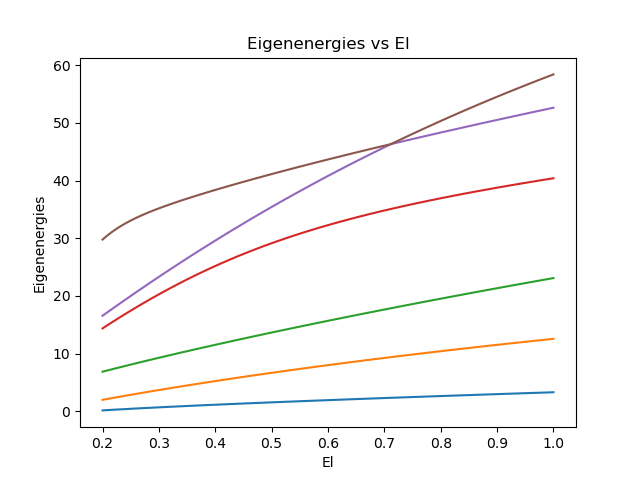

  0%|          | 0/100 [00:00<?, ?it/s]

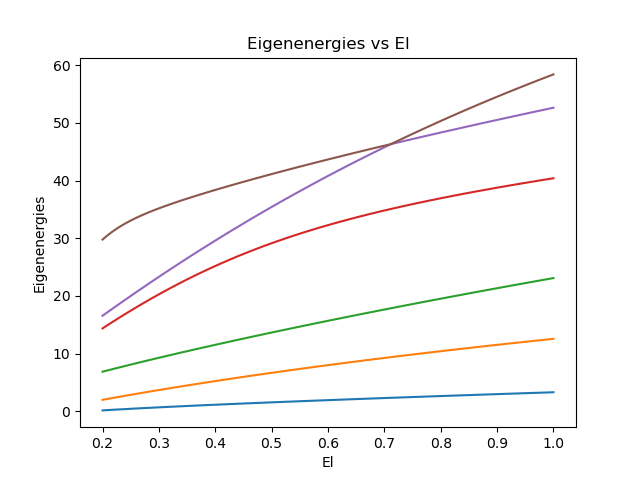

In [11]:
fixed_params = {
    'Ec': 60,
    'Delta': 20,
    'phi_ext': 0,
    'r' : 0.05,
    'dimension': 100
}

El_array = np.linspace(0.2, 1, 100)

eigenenergies = fb.eigenenergies_vs_parameter('El', El_array, fixed_params)

  0%|          | 0/100 [00:00<?, ?it/s]

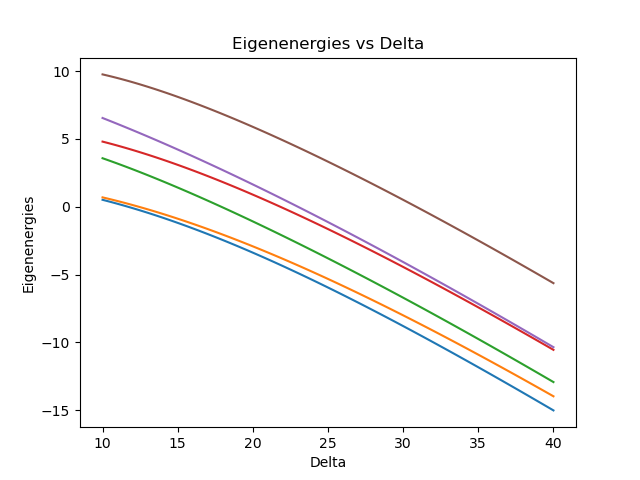

  0%|          | 0/100 [00:00<?, ?it/s]

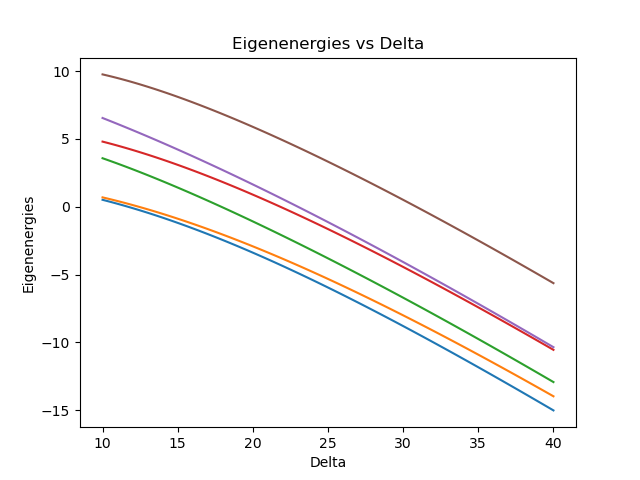

In [12]:
fixed_params = {
    'Ec': 40,
    'El': 0.05,
    'phi_ext': 0,
    'r' : 0.05,
    'dimension': 100
}

Delta_array = np.linspace(10, 40, 100)

eigenenergies = fb.eigenenergies_vs_parameter('Delta', Delta_array, fixed_params)

  0%|          | 0/100 [00:00<?, ?it/s]

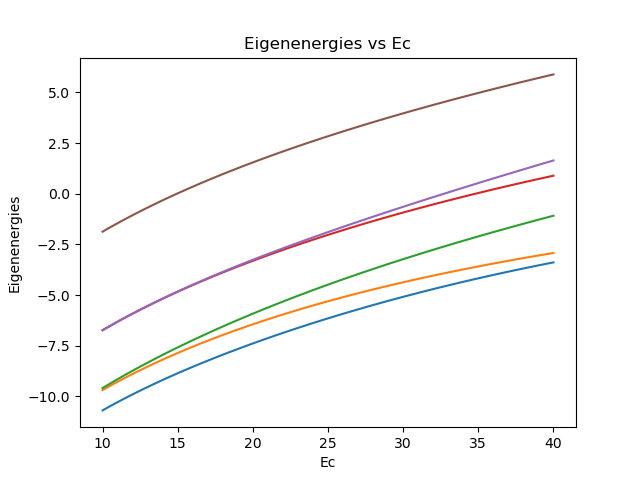

In [13]:
fixed_params = {
    'El': 0.05,
    'Delta' : 20,
    'phi_ext': 0,
    'r' : 0.05,
    'dimension': 100
}

Ec_array = np.linspace(10, 40, 100)

eigenenergies = fb.eigenenergies_vs_parameter('Ec', Ec_array, fixed_params)

  0%|          | 0/100 [00:00<?, ?it/s]

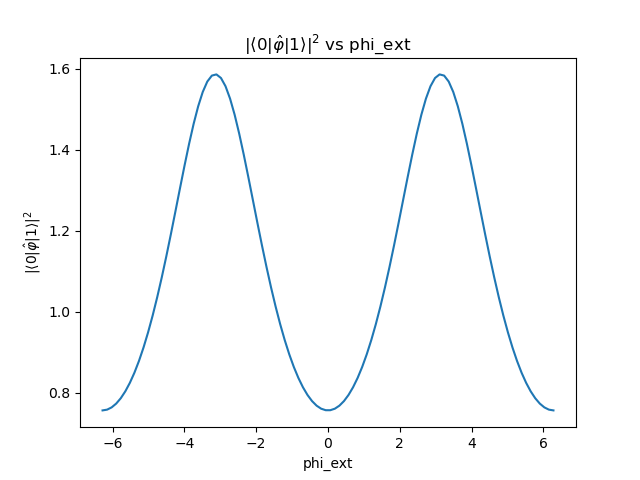

In [14]:
fixed_params = {
    'Ec': 50,
    'El': 0.05,
    'Delta': 20,
    'r': 0.05,
    'dimension': 100
}

phi_ext_array = np.linspace(-2*np.pi, 2*np.pi, 100)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='phi_ext', parameter_values=phi_ext_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

In [15]:
fixed_params = {
    'Ec': 50,
    'Delta': 20,
    'r': 0.05,
    'phi_ext': 0,
    'dimension': 100
}

El_array = np.linspace(0.01, 1, 100)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='El', parameter_values=El_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

  0%|          | 0/100 [00:00<?, ?it/s]

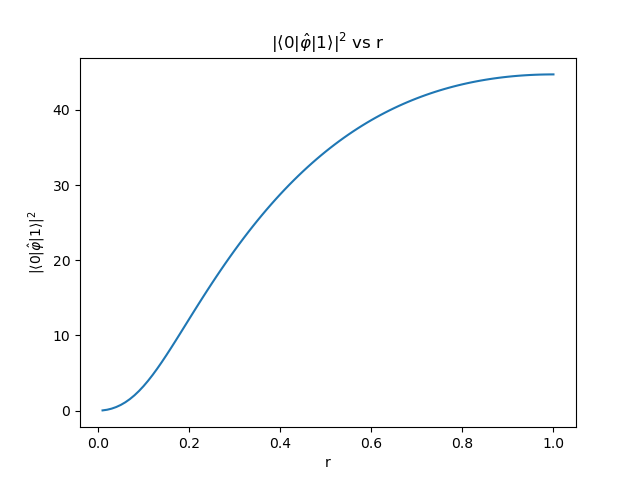

  0%|          | 0/100 [00:00<?, ?it/s]

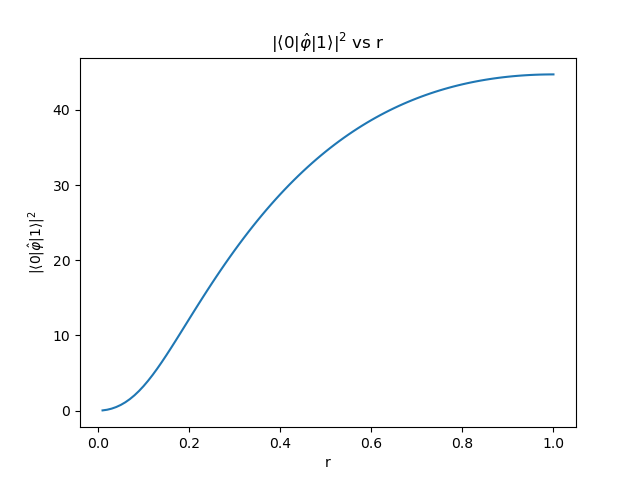

In [ ]:
fixed_params = {
    'Ec': 50,
    'El': 0.05,
    'Delta': 20,
    'phi_ext': 0,
    'dimension': 100
}

r_array = np.linspace(0, 1, 100)

matrix_elements, eigenenergies = fb.matrix_elements_vs_parameter(parameter_name='r', parameter_values=El_array, operator_name='phase', state_i=0, state_j=1, fixed_params=fixed_params)